In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

###Linear Regression

In [7]:
A = np.array(
[
    [3.,2,1],
    [1,-1,-1],
    [1,10,-20]
])
B = np.array([10.,-4,-39])
print (A,B)

[[  3.   2.   1.]
 [  1.  -1.  -1.]
 [  1.  10. -20.]] [ 10.  -4. -39.]


In [8]:
def forward(A,B):
    newA = A.copy()
    newB = B.copy()
    nrow, ncol = A.shape 
    for pivot_row in range(nrow-1): # 0 - n-1
        for elim_row in range(pivot_row+1, nrow):  
            c = newA[elim_row,pivot_row]/newA[pivot_row,pivot_row]
            newA[elim_row,:] = newA[elim_row,:]-c*newA[pivot_row,:] 
            newB[elim_row] = newB[elim_row]-c*newB[pivot_row]
    return newA, newB

In [9]:
print(forward(A,B))

(array([[  3.        ,   2.        ,   1.        ],
       [  0.        ,  -1.66666667,  -1.33333333],
       [  0.        ,   0.        , -27.8       ]]), array([ 10.        ,  -7.33333333, -83.4       ]))


In [12]:
def backward(A,B):
    newA = A.copy()
    newB = B.copy()
    nrow, ncol = A.shape 
    for pivot_row in range(nrow-1,0,-1): 
        for elim_row in range(pivot_row-1,-1,-1):  
            c = newA[elim_row,pivot_row]/newA[pivot_row,pivot_row]
            newA[elim_row,:] = newA[elim_row,:]-c*newA[pivot_row,:] 
            newB[elim_row] = newB[elim_row]-c*newB[pivot_row]
    return newA, newB               

In [13]:
newA, newB = forward(A,B)
print(backward(newA,newB))

(array([[  3.        ,   0.        ,   0.        ],
       [  0.        ,  -1.66666667,   0.        ],
       [  0.        ,   0.        , -27.8       ]]), array([  3.        ,  -3.33333333, -83.4       ]))


In [14]:
def solve(A,B):
    newA = A.copy()
    newB = B.copy()
    nrow, ncol = A.shape 
    for i in range(nrow):
        newB[i] = newB[i]/newA[i][i]
        newA[i][i] = 1
    return newB        

In [15]:
ansA, ansB = backward(newA,newB)
print(solve(ansA,ansB))

[ 1.  2.  3.]


In [16]:
#stress test

n =10
np.random.seed(5555)
A = np.random.rand(n,n)
B = np.random.rand(n)

print (np.linalg.solve(A,B))
newA = A.copy()
newB = B.copy()
newA,newB = forward(newA,newB)
newA,newB = backward(newA,newB)
print (solve(newA,newB))

[  6.43642173  -9.24228986   9.71582867  -8.67785757  -8.26517523
  -5.74703415  12.92092974 -24.11379082   5.54942117  20.02017518]
[  6.43642173  -9.24228986   9.71582867  -8.67785757  -8.26517523
  -5.74703415  12.92092974 -24.11379082   5.54942117  20.02017518]


In [ ]:
AA = A.copy
A[1,:] -1/3.*A[0,:]
A[1,:] =  A[1,:] -1/3.*A[0,:]
print(A)
nrow, ncol = A.shape
print(nrow, ncol)

In [ ]:
np.linalg.solve(A,B) #cheat

1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

In [4]:
data_x,data_y = np.loadtxt('linear.txt')

2) Plot `data_x` vs `data_y`

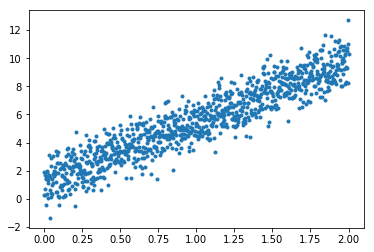

In [5]:
plt.plot(data_x,data_y,'.')

3) What what is the equation for a striaght line?

4) What is the difference between a "good line" and a "bad line"?

5) What are we trying to adjust to minimize the $\chi^2$?

6) How do we findind the minimum of $\chi^2$? Whare are they?

7) Find the best slope and the best intercept.

In [3]:
sumofx2 = sum([x**2 for x in data_x])
sumofx = sum(data_x)
n = len(data_x)
sumofxy = sum(data_x*data_y)
sumofy = sum(data_y)
A = np.array([ 
    [sumofx2, sumofx],
    [sumofx, n]
])
B = [sumofxy,sumofy]
print(solve(A,B))

NameError: name 'data_x' is not defined

In [8]:
def s(nx,ny):
    return np.sum(data_x**nx*data_y**ny)

A = np.array([
    [s(2,0),s(1,0)],
    [s(1,0),s(0,0)]
])
B = np.array([s(1,1),s(0,1)])

a, b=np.linalg.solve(A,B)
print(a,b) 
print(s(1,1))


4.3080543746 1.19580915962
6942.75657025


8) Plot the line along with the data point to verify that you actually got the right answer.

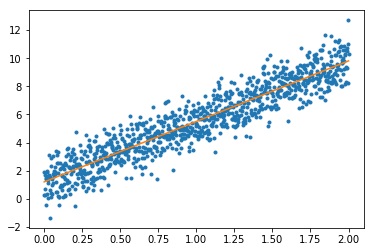

In [9]:
plt.plot(data_x,data_y,'.')
xs = np.linspace(0,2,100)
ys = [a*x+b for x in xs]
plt.plot(xs,ys)


9) What is your prediction for the value of `y` when `x`=3.0?

###Generalization

The technique we learn above of finding the parameter that minimize the $\chi^2$ does not limit you to just a straight line model. Let us use it for a more general problem.

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

2) What is the general form for parabola?

3) What is the difference between a "good line" and a "bad line"?

4) What are we trying to minimize in order to find the best parabola?

5) Find the best fitted parabola and plot to verify.

-0.504935161845 0.305858733641 0.976680555745


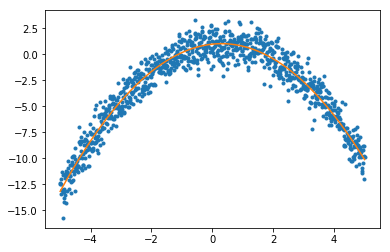

In [13]:
da_x,da_y = np.loadtxt('parabola.txt')
plt.plot(da_x,da_y,'.')

def s(nx,ny):
    return np.sum(da_x**nx*da_y**ny)

C = np.array(
    [[s(4,0),s(3,0),s(2,0)],
     [s(3,0),s(2,0),s(1,0)],
     [s(2,0),s(1,0),s(0,0)]])
     
D = np.array([s(2,1),s(1,1),s(0,1)])
a,b,c= np.linalg.solve(C,D)
print(a,b,c)

xs = np.linspace(-5,5,1000)
ys = [a*x**2+b*x+c for x in xs]
plt.plot(xs,ys)

###Extra

Find something interesting from http://www.stat.ufl.edu/~winner/datasets.html and make some prediction.